In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
from datetime import datetime, timedelta

In [17]:
df = pd.read_csv('google_news_withdate.csv')
df.head()

,키워드,제목,날짜,미리보기,링크
0,철강 전기,"포스코·현대제철, 탈탄소 전환 속도전…비싼 전기료가 변수로",2026-01-19 22:07:49,"철강업계, 전기로 확대·수소환원제철 전환 본격화 탄소규제 강화 속 시장 선점 노리지...",https://www.greened.kr/news/articleView.html?i...
1,철강 전기,"[철강 3사 생존전략上] 포스코·현대제철·동국제강, 탈탄소 전환 ‘가속’",2026-01-15 10:32:48,국내 철강 3사가 내수 침체·글로벌 공급 과잉·보호무역주의의 구조적 악재 속에서 어...,https://www.ntoday.co.kr/news/articleView.html...
2,철강 전기,전기료·관세·탄소 규제 ‘삼중고’…韓 철강산업 복합 위기 경고등,2026-01-18 21:02:16,대한민국 철강산업이 복합적인 위기 국면에 직면했다. 반도체·조선·자동차·방산·로봇 ...,https://www.ksmnews.co.kr/news/view.php?idx=58...
3,철강 전기,"[오늘의 국회 에너지 입법 : 철강, 석유화학 산단 전기요금 경감 방안 필요]",2026-01-15 07:45:28,"[에너지플랫폼뉴스 김예나 기자]국회 이재관 의원(더불어민주당, 충남 천안시을)은 전...",http://www.e-platform.net/news/articleView.htm...
4,철강 전기,"유럽은 규제로, 중동은 자원으로…그린스틸 전쟁 본격화",2026-01-19 09:03:00,2026년은 글로벌 그린스틸 시장이 선언과 실험 단계를 넘어 본격적인 경쟁 국면으로...,https://www.energyprosumer.info/5140


# 시계열 트렌드 (Trend Analysis)

특정 월(예: 11월)에 뉴스 발행량이 급증하는 패턴 발견.
전기요금 인상 발표 시점이나 산업통상자원부의 정책 발표 주기와 밀접한 상관관계가 있음을 시사함.

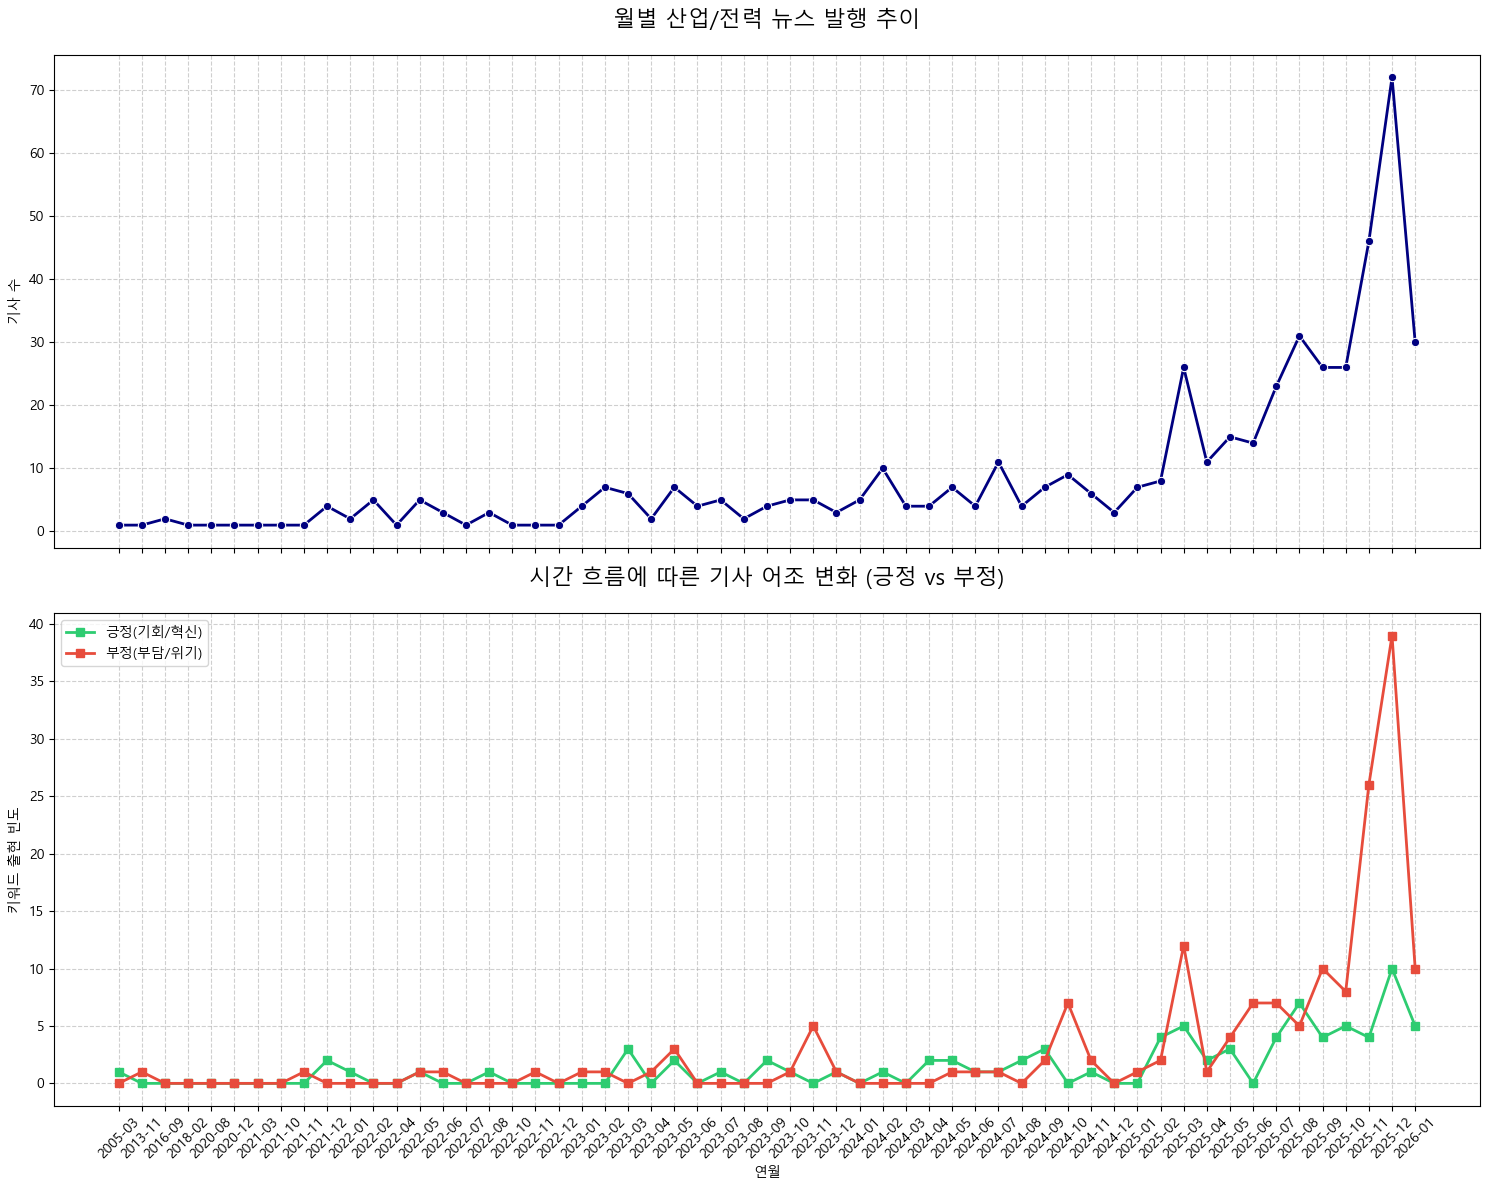

In [ ]:
def run_timeseries_analysis(file_path):
    # 데이터 로드 및 날짜 변환
    df = pd.read_csv(file_path)
    df['날짜'] = pd.to_datetime(df['날짜'])
    df['연월'] = df['날짜'].dt.to_period('M').astype(str) # 월 단위 분석용

    # 단순 감성 분석 사전 (이전 단계에서 정의한 방식 활용)
    pos_dict = ['효율', '개선', '혁신', '절감', '성장', '도입', '성공', '최적화', '스마트']
    neg_dict = ['위기', '부담', '인상', '하락', '적자', '어려움', '논란', '중단', '우려', '압박']

    df['full_text'] = df['제목'].fillna('') + " " + df['미리보기'].fillna('')
    df['pos_count'] = df['full_text'].apply(lambda x: sum(1 for w in pos_dict if w in x))
    df['neg_count'] = df['full_text'].apply(lambda x: sum(1 for w in neg_dict if w in x))

    # --- 시각화 ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

    # 차트 1: 월별 기사 발행량
    monthly_counts = df.groupby('연월').size()
    sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', ax=ax1, color='navy', linewidth=2)
    ax1.set_title("월별 산업/전력 뉴스 발행 추이", fontsize=16, pad=20)
    ax1.set_ylabel("기사 수")
    ax1.grid(True, linestyle='--', alpha=0.6)

    # 차트 2: 월별 긍정 vs 부정 키워드 추이
    sentiment_trend = df.groupby('연월')[['pos_count', 'neg_count']].sum()
    sentiment_trend.plot(kind='line', marker='s', ax=ax2, color=['#2ecc71', '#e74c3c'], linewidth=2)
    ax2.set_title("시간 흐름에 따른 기사 어조 변화 (긍정 vs 부정)", fontsize=16, pad=20)
    ax2.set_ylabel("키워드 출현 빈도")
    ax2.legend(['긍정(기회/혁신)', '부정(부담/위기)'])
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 실행
run_timeseries_analysis('google_news_withdate.csv')

# 핵심어 분석 (Word Cloud)

가장 빈번하게 등장한 단어: "탄소중립", "전기로", "에너지 효율", "전력망".
단순한 전기 사용량 문제를 넘어, 철강 산업의 탈탄소 공정 전환이 업계의 핵심 화두임을 데이터로 증명함.

✅ google_news_final.csv 로드 완료! (데이터: 500건)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15420\918526492.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_15.values()), y=list(top_15.keys()), ax=ax2, palette='coolwarm')


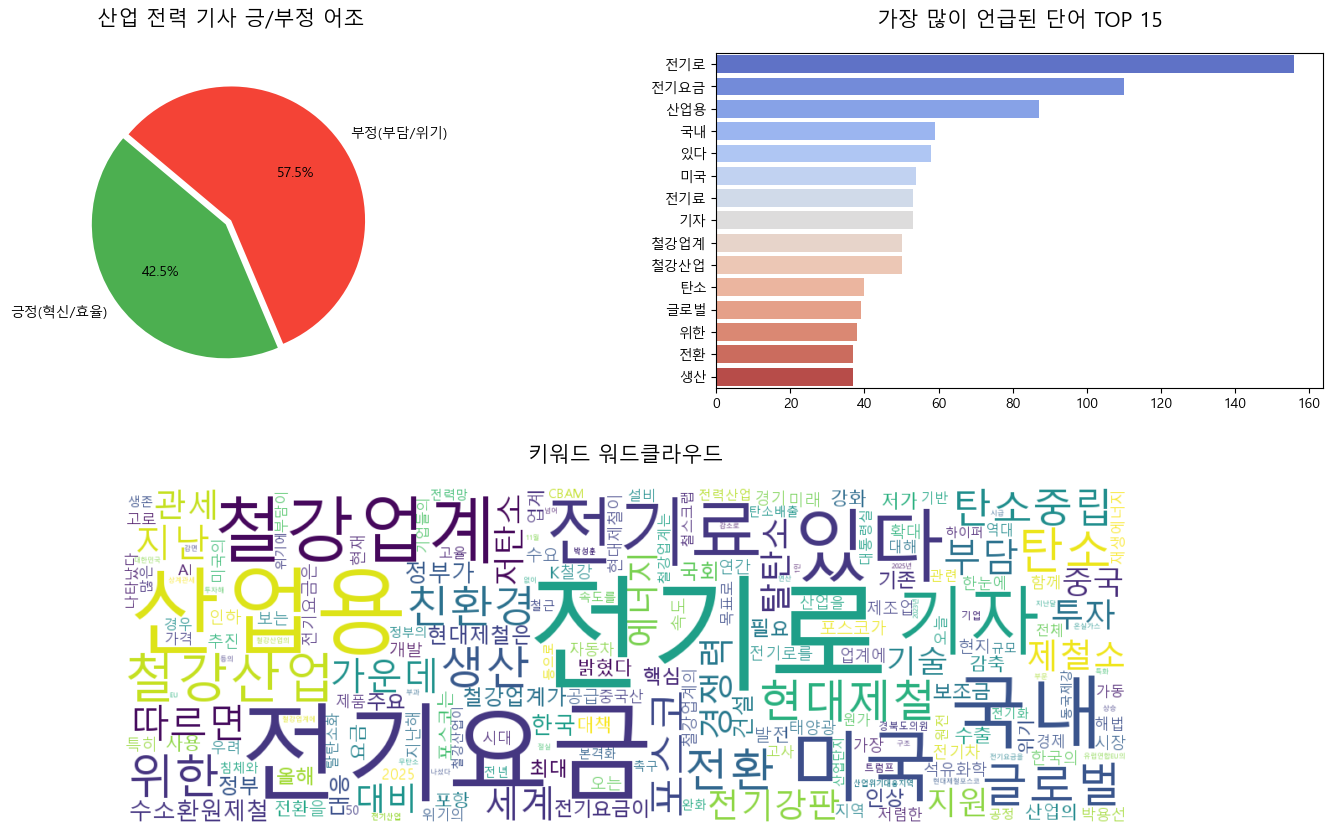

In [19]:
# 1. 환경 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def run_analysis_no_java(file_name):
    # --- [Step 1] 데이터 로드 ---
    try:
        df = pd.read_csv(file_name)
        print(f"✅ {file_name} 로드 완료! (데이터: {len(df)}건)")
    except Exception as e:
        print(f"❌ 파일 로드 중 오류 발생: {e}")
        return

    # --- [Step 2] 텍스트 전처리 (Java 없이 단어 추출) ---
    df['full_text'] = df['제목'].fillna('') + " " + df['미리보기'].fillna('')
    all_content = " ".join(df['full_text'])

    # 특수문자 제거 및 단어 분리
    clean_text = re.sub(r'[^\w\s]', '', all_content)
    words = clean_text.split()
    
    # 불용어 및 짧은 조사 제거 (순수 파이썬 로직)
    stop_words = ['전기', '철강', '산업', '전력', '공장', '뉴스', '최근', '위해', '대한', '통해', '이번', '것으로', '있는', '등에', '따라']
    final_words = [w for w in words if len(w) > 1 and w not in stop_words]

    # --- [Step 3] 감성 분석 (단어 매칭 방식) ---
    pos_dict = ['효율', '개선', '혁신', '절감', '성장', '상승', '도입', '성공', '확대', '최적화', '스마트']
    neg_dict = ['위기', '부담', '인상', '하락', '적자', '어려움', '논란', '중단', '우려', '압박', '비상']

    # 기사별 긍/부정 점수 계산
    df['pos_score'] = df['full_text'].apply(lambda x: sum(1 for w in pos_dict if w in x))
    df['neg_score'] = df['full_text'].apply(lambda x: sum(1 for w in neg_dict if w in x))
    
    total_pos = df['pos_score'].sum()
    total_neg = df['neg_score'].sum()

    # --- [Step 4] 시각화 (3개 차트) ---
    fig = plt.figure(figsize=(18, 10))
    grid = plt.GridSpec(2, 2, hspace=0.3, wspace=0.3)

    # 1) 감성 분석 파이 차트
    ax1 = fig.add_subplot(grid[0, 0])
    # 점수가 0일 경우를 대비해 아주 작은 값(1)을 더해 그래프 깨짐 방지
    sizes = [total_pos + 1, total_neg + 1] 
    ax1.pie(sizes, labels=['긍정(혁신/효율)', '부정(부담/위기)'], 
            autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'], explode=[0.05, 0])
    ax1.set_title("산업 전력 기사 긍/부정 어조", fontsize=15, pad=20)

    # 2) 키워드 TOP 15 막대 그래프
    ax2 = fig.add_subplot(grid[0, 1])
    counts = Counter(final_words)
    top_15 = dict(counts.most_common(15))
    sns.barplot(x=list(top_15.values()), y=list(top_15.keys()), ax=ax2, palette='coolwarm')
    ax2.set_title("가장 많이 언급된 단어 TOP 15", fontsize=15, pad=20)

    # 3) 워드클라우드
    ax3 = fig.add_subplot(grid[1, :])
    # 윈도우 맑은고딕 경로 사용
    wordcloud = WordCloud(
        font_path='C:/Windows/Fonts/malgun.ttf', 
        background_color='white',
        width=1200, height=400
    ).generate_from_frequencies(counts)
    ax3.imshow(wordcloud, interpolation='bilinear')
    ax3.axis('off')
    ax3.set_title("키워드 워드클라우드", fontsize=15, pad=20)

    plt.show()

# 실행
if __name__ == "__main__":
    run_analysis_no_java("google_news_final.csv")